In [1]:
import numpy as np
from scipy.linalg import solve


In [30]:
def initial_condition(x):
    return np.sin(np.pi * x/2)  # 假設初始條件為正弦函數

D = 1  # 擴散係數
dx = 0.2  # 空間步長
dt = 0.3  # 時間步長
T = 2.0  # 總時間


In [31]:
def crank_nicolson_solver(D, u0, dx, dt, T):
    N = int(T / dt)  # 時間步數
    M = int(1 / dx)  # 空間步數
    
    r = D * dt / (2 * dx**2)  # 無量綱參數
    
    # 建立網格
    x = np.linspace(0, 1, M + 1)
    t = np.linspace(0, T, N + 1)
    
    # 初始化網格數值
    u = np.zeros((M + 1, N + 1))
    u[:, 0] = u0(x)
    
    # 構造三對角矩陣
    A = np.diag((1 + r) * np.ones(M - 1)) + np.diag(-r / 2 * np.ones(M - 2), 1) + np.diag(-r / 2 * np.ones(M - 2), -1)
    print(A)
    B = np.diag((1 - r) * np.ones(M - 1)) + np.diag(r / 2 * np.ones(M - 2), 1) + np.diag(r / 2 * np.ones(M - 2), -1)
    print(B)
    for n in range(1, N + 1):
        b = B @ u[1:M, n-1]
        b[0] += r / 2 * u[0, n]
        b[-1] += r / 2 * u[M, n]
        
        # 解線性系統
        u[1:M, n] = solve(A, b)
    
    return x, t, u


[[ 4.75  -1.875  0.     0.   ]
 [-1.875  4.75  -1.875  0.   ]
 [ 0.    -1.875  4.75  -1.875]
 [ 0.     0.    -1.875  4.75 ]]
[[-2.75   1.875  0.     0.   ]
 [ 1.875 -2.75   1.875  0.   ]
 [ 0.     1.875 -2.75   1.875]
 [ 0.     0.     1.875 -2.75 ]]


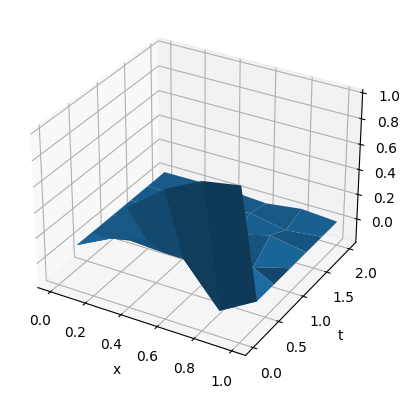

In [32]:
x, t, u = crank_nicolson_solver(D, initial_condition, dx, dt, T)

# 繪製結果
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u.T)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()


In [23]:
X

array([[0. , 0.2, 0.4, 0.6, 0.8, 1. ]])

In [18]:
T

array([[0., 0., 0., 0., 0., 0.]])

In [19]:
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [20]:
t

array([0.])

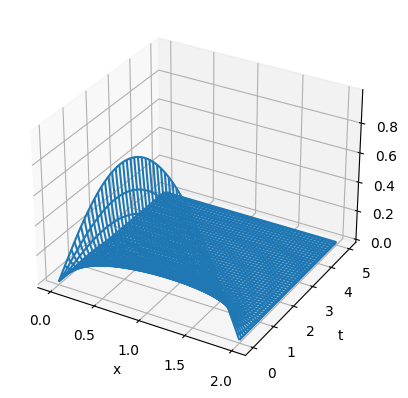

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def exact_solution(x, t):
    return np.exp(-((np.pi**2) * t)/4) * np.sin((np.pi * x)/2)

# 设置绘图参数
x = np.linspace(0, 2, 100)  # x范围
t = np.linspace(0,5, 100)  # t范围
X, T = np.meshgrid(x, t)  # 创建网格点
U = exact_solution(X, T)  # 计算精确解在网格点上的值

# 绘制图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, T, U, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

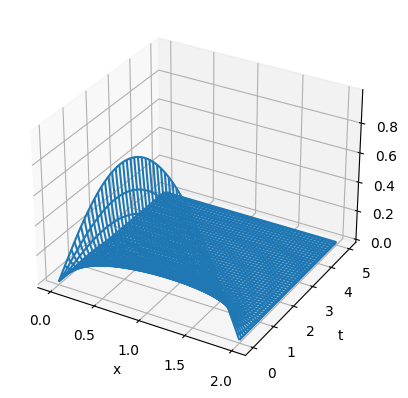

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def exact_solution(x, t):
    return np.exp(-((np.pi**2) * t)/4) * np.sin((np.pi * x)/)

# 设置绘图参数
x = np.linspace(0, 2, 100)  # x范围
t = np.linspace(0, 5, 100)  # t范围
X, T = np.meshgrid(x, t)  # 创建网格点
U = exact_solution(X, T)  # 计算精确解在网格点上的值

# 绘制图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()